In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (10,5)

In [2]:
data = pd.read_csv('parsed_afisha_districts_filtered.csv', index_col=0)

In [3]:
data = data.dropna()

In [4]:
data[['Money', 'Rating', 'lat', 'lng']] = data[['Money', 'Rating', 'lat', 'lng']].apply(pd.to_numeric)
data[['Name', 'Address', 'Metro', 'District']] = data[['Name', 'Address', 'Metro', 'District']].astype(str)

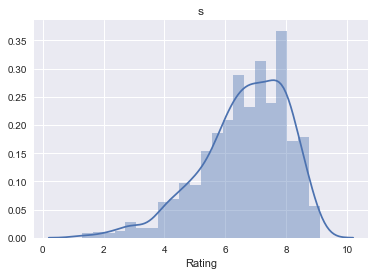

In [5]:
plt.title('Histogram of rat')
sns.distplot(data['Rating'])

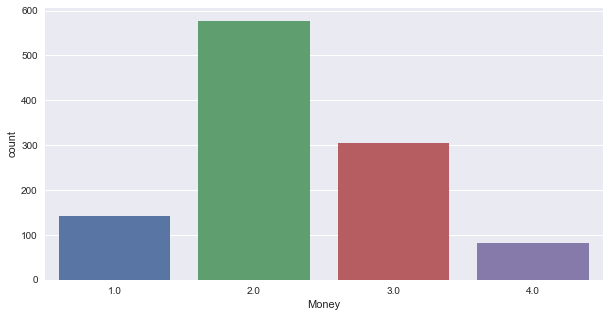

In [100]:
sns.countplot(data['Money'])

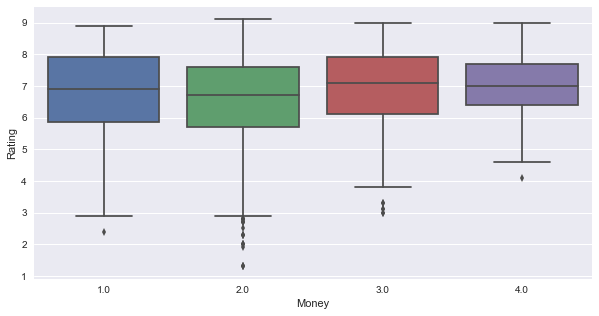

In [101]:
sns.boxplot(x='Money', y='Rating', data=data)
plt.show()

In [102]:
# Clean up districts with lower than 5 bars
dist_agg = data.groupby('District').count().reset_index()
dist_agg = dist_agg[dist_agg['Name'] > 5]
data_contains_5_bars = data[data['District'].isin(dist_agg['District'])]

In [103]:
aggregated_disticts = data_contains_5_bars.groupby('District').agg({"Rating": "mean", "Money": "mean"}).reset_index()

In [105]:
sorted_agg_dist = aggregated_disticts.sort_values(['Rating', 'Money'], ascending=[False, True])

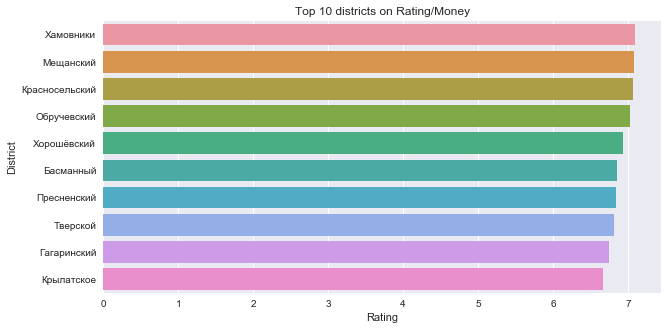

In [106]:
sns.barplot(x='Rating', y='District', data = sorted_agg_dist[:10])
plt.title('Top 10 districts on Rating/Money')
plt.show()

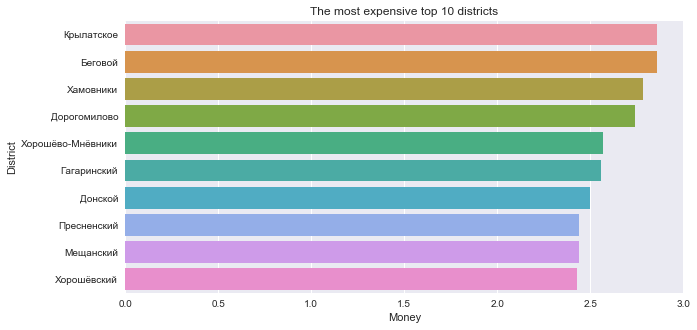

In [110]:
sorted_agg_dist = sorted_agg_dist.sort_values(['Money'], ascending=False)
sns.barplot(x='Money', y='District', data = sorted_agg_dist[:10])
plt.title("The most expensive top 10 districts")
plt.show()